# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')


# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
print(f'Number of mice: {num_mice}')


Number of mice: 249


In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
print("Data for the duplicate Mouse ID:")
print(duplicate_mouse_data)

Data for the duplicate Mouse ID:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Fema

In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

print("Clean DataFrame after dropping duplicate mice:")
clean_data.head()

Clean DataFrame after dropping duplicate mice:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()
print(f'The number of unique mice: {num_mice_clean}')


The number of unique mice: 249


## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = clean_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
)

print("Summary Statistics of Tumor Volume for Each Regimen:")
print(summary_statistics)

Summary Statistics of Tumor Volume for Each Regimen:
              mean_tumor_volume  median_tumor_volume  variance_tumor_volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Variance_Tumor_Volume='var',
    Standard_Deviation_Tumor_Volume='std',
    SEM_Tumor_Volume='sem'
)
# Using the aggregation method, produce the same summary statistics in a single line
print("Summary Statistics of Tumor Volume for Each Regimen:")
print(summary_statistics_advanced)

Summary Statistics of Tumor Volume for Each Regimen:
              Mean_Tumor_Volume  Median_Tumor_Volume  Variance_Tumor_Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Timepoints')

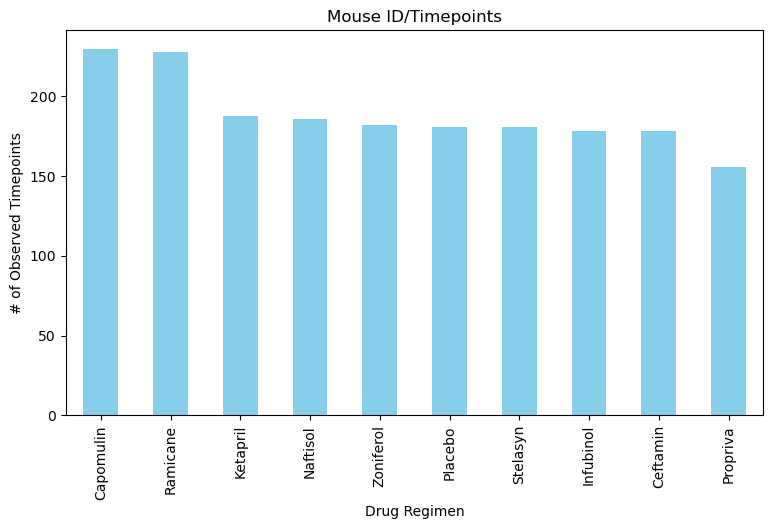

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create Bart Plot
regimen_counts.plot(kind='bar', color='skyblue', figsize=(9, 5))

# Titles and Labels
plt.title('Mouse ID/Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')

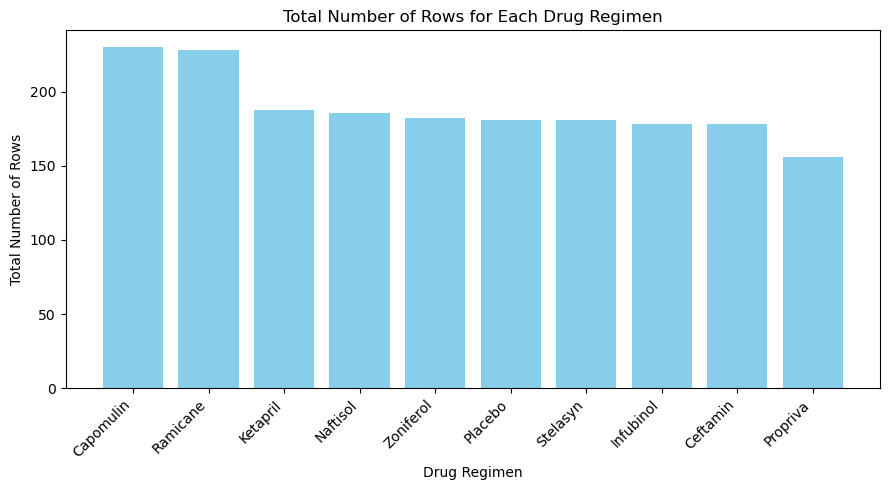

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(9, 5))
plt.bar(regimen_counts.index, regimen_counts, color='skyblue')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Rotate x labels
plt.xticks(rotation=45, ha='right')

# Display 
plt.tight_layout()
plt.show()

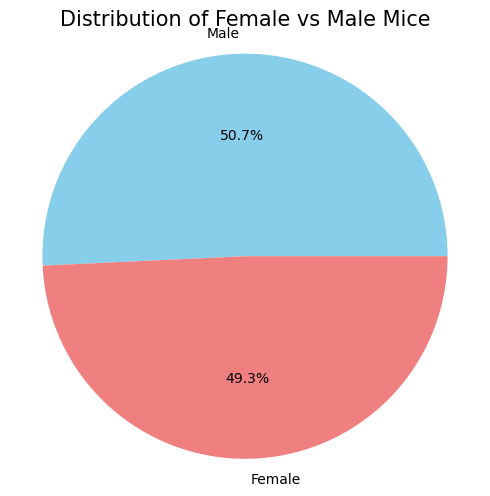

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()

# Pie plot 
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], figsize=(5, 5))

# Title and labels
plt.title('Distribution of Female vs Male Mice', fontsize=15)
plt.ylabel('')  

# Display the plot
plt.tight_layout()
plt.axis('equal')  
plt.show()

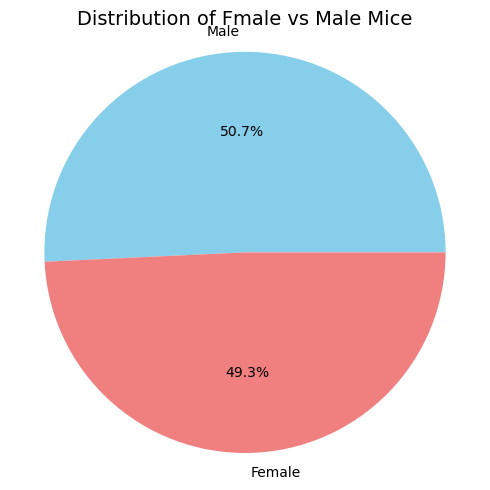

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts=clean_data['Sex'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Distribution of Fmale vs Male Mice', fontsize=14)

plt.axis('equal')

plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()

last_timepoint_df = last_timepoint.reset_index()

final_tumor_volume = pd.merge(last_timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(specific_regimens)]

print("Final Tumor Volume of Each Mouse for Specific Treatment Regimens:")
print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


Final Tumor Volume of Each Mouse for Specific Treatment Regimens:
    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [57]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to fill with tumor vol data 
tumor_volume_data = []

# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatments:
    
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    

    # Locate the rows which contain data and append
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate quartiles, IQR, and bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Outliers 
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print information
    print(f"Summary for {treatment}:")
    print(f"  Lower Quartile: {lower_quartile}")
    print(f"  Upper Quartile: {upper_quartile}")
    print(f"  Interquartile Range (IQR): {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential outliers: {outliers}\n")

Summary for Capomulin:
  Lower Quartile: 32.37735684
  Upper Quartile: 40.1592203
  Interquartile Range (IQR): 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Summary for Ramicane:
  Lower Quartile: 31.56046955
  Upper Quartile: 40.65900627
  Interquartile Range (IQR): 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Summary for Infubinol:
  Lower Quartile: 54.04860769
  Upper Quartile: 65.52574285
  Interquartile Range (IQR): 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Summary for Ceftamin:
  Lower Quartile: 48.72207785
  Upper Quartile: 64.29983003
  Interquartile Range (IQR): 15.577752179999997
  Lower Bound: 25.355449580000002
  Upper Bound: 87.6664582999

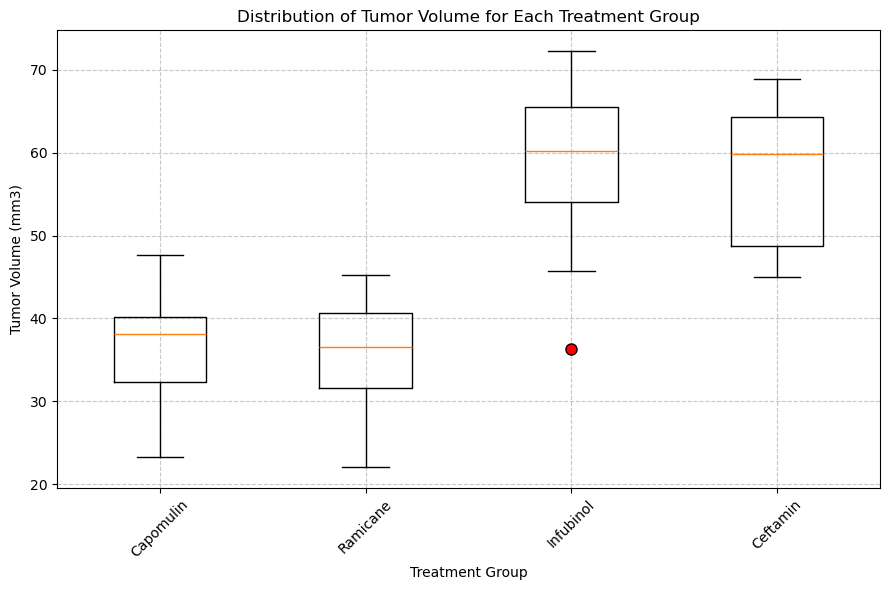

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(9, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Title
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Display
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

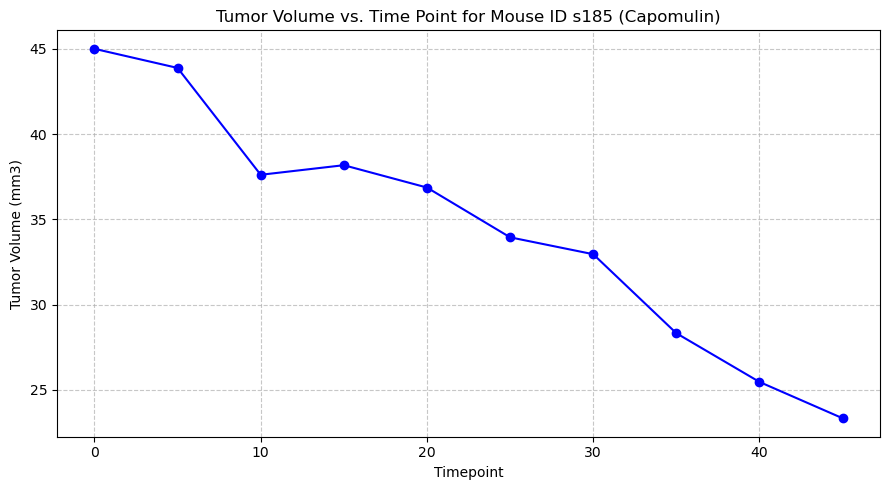

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Single mouse treated with Capomulin
selected_mouse_id = 's185'  # Choose a specific mouse ID treated with Capomulin

# Selected mouse
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]


plt.figure(figsize=(9, 5))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')

#  Labels & Title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {selected_mouse_id} (Capomulin)')

# Display
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

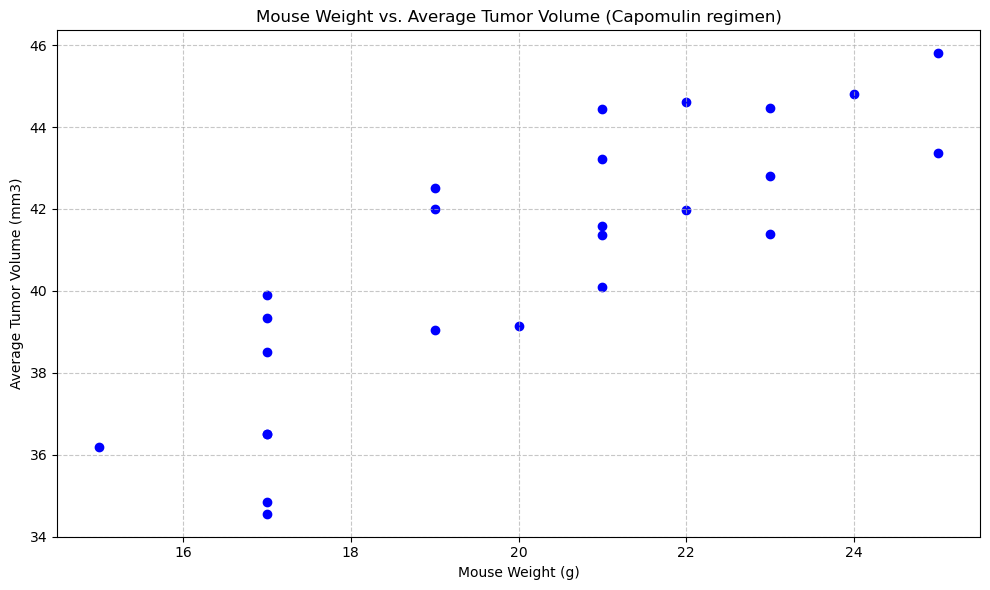

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group the data 
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Plot mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue')

# Labels
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin regimen)')

# Display 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.841936342469472


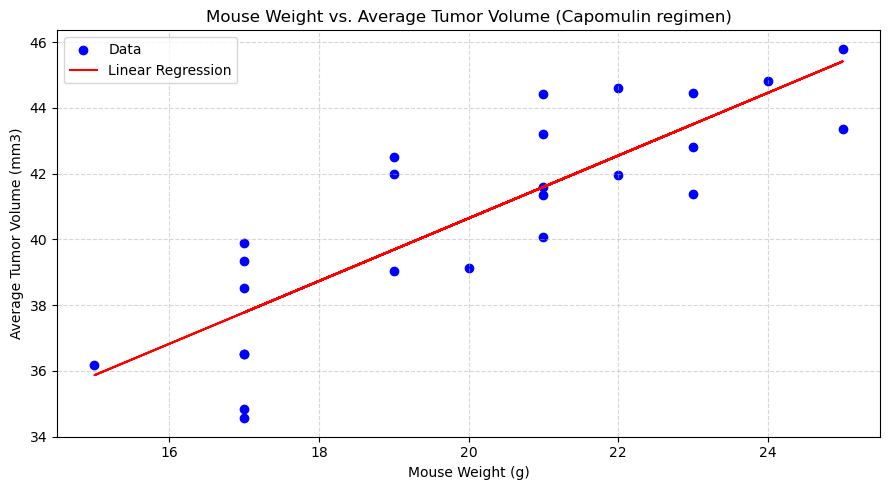

In [69]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weight, average_tumor_volume)
print(f"Correlation Coefficient: {correlation_coefficient}")

# Calculate the linear regression 
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Plot
plt.figure(figsize=(9, 5))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue', label='Data')
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Linear Regression')

# Labels
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin regimen)')
plt.legend()

# Display 
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()